<a href="https://colab.research.google.com/github/PedroGFerreira/AdvancedTopicsMachineLeaning/blob/main/TAAC_nb1_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Translating text from Portuguese to English
We will test two approaches to use an LLM for text translation.


1.   Using a Pre-trained and open-source model
2.   Using API to Access a commercial LLM

For 1) we will HuggingFace that provides the Transformers library and access to different models.  The Transformers will be explored in more detail in a subsequent notebook.
The model will be the unicamp-dl/translation-pt-en-t5:
[link text](https://huggingface.co/unicamp-dl/translation-pt-en-t5)

This is an implementation of T5 for translation in PT-EN tasks using a modest hardware setup.

**Note that models regarding the portuguese language are not so frequent. **

At HuggingFace there is at least another PT to EN translator from Unbabel. But this is a much larger model with 13B parameters that is trained to perform other tasks besides translation: [link text](https://huggingface.co/Unbabel/TowerInstruct-13B-v0.1)


For 2) we will use the chtGPT version3.5-turbo. To access this program programatically via an API you will need to have API key. You should register at the openAI website and generate an API Key. Your scriptin environment should be set to this Key.





In [ ]:
# Install all the necessaries packages
# creating a virtual environment in your project directory
!python -m venv .env
# Activate the virtual environment
!source .env/bin/activate
# ready to install 🤗 Transformers with the following command:
!pip install transformers
!pip install openai

In [ ]:
# load here the packages for the remainder of the script
import os
import openai
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# 1. Pre-trained and Open-Source Translation Model

Here we use to approached to accomplish the translation task. A more direct approach is using the *pipeline* functionality from the Transformers package.

A second approach is to use the functionality apply_chat_template that is used to create an interactive chating approach. This may not be the most adequate approach since the translation model used here is more adequate for direct translations. Nevertheless, the chat-based template is used for demonstration. See more here:
[link text](https://huggingface.co/docs/transformers/main/en/chat_templating
)

In [141]:
 # Initialize the translation pipeline using a model trained for Portuguese to English translation
pten_pipeline = pipeline('text2text-generation', model="unicamp-dl/translation-pt-en-t5")

# portuguese text to translate
portuguese_text = "Bem vindo ao curso de Tópicos Avançados de Aprendizagem Automática"

# 1 - Using directly the pipeline function from Hugging Face
text_to_translate = "translate Portuguese to English: %s" % portuguese_text
translated_text = pten_pipeline(text_to_translate)[0]['generated_text']
print("Translated Text:", translated_text)

# 2- Chat Template
# The apply_chat_template is a method in Huggingface's tokenizers library that can be used to format messages in a chat-like context.
# This method is often used with models that are designed for chat-based interactions.
# using the apply_chat_template with a translation model such as those in the AutoModelForSeq2SeqLM family isn't standard, since these models aren't usually designed for chat-style inputs.

tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")
model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")

# Apply chat template (conceptual example)
formatted_input = tokenizer.apply_chat_template(
    [
        {"role": "system", "content": "You are a translator. Translate the following text from Portuguese to English."},
        {"role": "user", "content": portuguese_text}
    ],
    roles=["system", "user"],
    return_tensors="pt"
)

# Generate the translation
generated_tokens = model.generate(
    formatted_input,
    max_length=200,  # Adjust based on the expected length of the output
)

# Decode the generated tokens to get the translated text
translated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Print the translated text
# Note that the text contains the identifiers that are used as control tokens.
print("Translated Text:", translated_text)

Translated Text: <|im_end|> <|im_start|>user Welcome to the Course of Advanced Topics of Automatic Learning<|im_end|> <|im_start|>system You are a translator. Translate the following text from


#Using an API to a Commercial Model

Here you need to start by setting the API KEY. In this case, as I was using colab, my Keys are stored in the "Secrets" section. In alternative the key can be hard coded in the text as:

```
openai.api_key = "........"
```



In [37]:
# Set up your OpenAI API key
openai.api_key = os.environ["OPENAI_API_KEY"]

# Define the Portuguese text to be translated
portuguese_text = "Bem vindo ao curso de Tópicos Avançados de Aprendizagem Automática"

# Use the OpenAI Chat API to translate the text
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",  # You can also use "gpt-4" if available
    messages=[
        {"role": "system", "content": "You are a helpful assistant that translates Portuguese to English."},
        {"role": "user", "content": f"Translate the following Portuguese text to English: {portuguese_text}"}
    ],
    temperature=0.0,  # Lower temperature for more deterministic output
)

# Extract the translated text
translated_text = response['choices'][0]['message']['content'].strip()

# Print the translated text
print("Translated Text:", translated_text)


Translated Text: Welcome to the Advanced Topics in Machine Learning course.


# Example Applications of Transformers with Hugging Face
Transformers has a layered API that allows to interact with library at various level of abstraction.
Here we will show some examples on how to perform


*   Classification
*   Named Entity Recognition
*   Question Answering
*   Summarization
*   Translation
*   Text Generation

We will use an example of a text obtained from two review at Amazon about the book that inspired some of the slides of this course:

*Building LLMs for Production: Enhancing LLM Abilities and Reliability with Prompting, Fine-Tuning, and RAG
by Louis-François Bouchard (Author), Louie Peters (Author)*

[link text](https://www.amazon.com/Building-LLMs-Production-Reliability-Fine-Tuning/dp/B0D4FFPFW8/ref=cm_cr_arp_d_product_top?ie=UTF8)


The book has a customer reivew score of 4.5 out of 5.0 (in 25/8/2024).

We will select a review text with a high score (5 stars) and a review text of 2 stars.

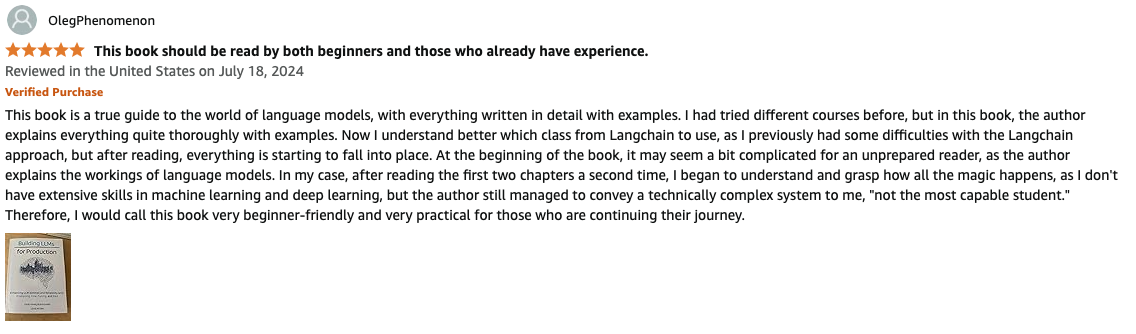

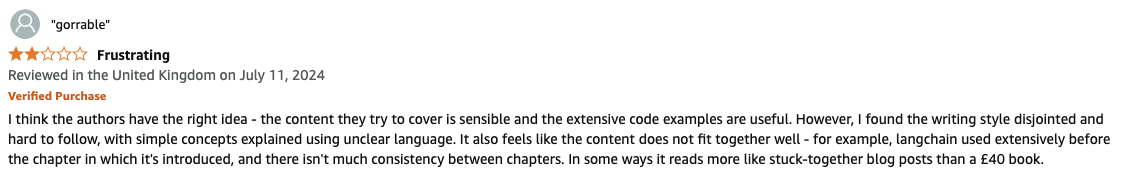

In [ ]:
# ready to install 🤗 Transformers with the following command:
!pip install transformers

In [31]:
from transformers import pipeline, AutoTokenizer, AutoModel

In [1]:
review_5stars = """ This book is a true guide to the world of language models, with everything written in detail with examples. I had tried different courses before, but in this book, the author explains everything quite thoroughly with examples. Now I understand better which class from Langchain to use, as I previously had some difficulties with the Langchain approach,  but after reading, everything is starting to fall into place. At the beginning of the book, it may seem a bit complicated for an unprepared reader, as the author explains the workings of language models. In my case, after reading the first two chapters a second time,  I began to understand and grasp how all the magic happens, as I don't have extensive skills in machine learning and deep learning but the author still managed to convey a technically complex system to me, "not the most capable student." Therefore, I would call this book very beginner-friendly and very practical for those who are continuing their journey. """


review_2stars = """ I think the authors have the right idea - the content they try to cover is sensible and the extensive code examples are useful.
However, I found the writing style disjointed and hard to follow, with simple concepts explained using unclear language.
It also feels like the content does not fit together well - for example, langchain used extensively before the chapter in which it's introduced,
and there isn't much consistency between chapters. In some ways it reads more like stuck-together blog posts than a £40 book.
"""

In [2]:
display(review_5stars)
print("\n\n")
display(review_2stars)

' This book is a true guide to the world of language models, with everything written in detail with examples. I had tried different courses before, but in this book, the author explains everything quite thoroughly with examples.\n Now I understand better which class from Langchain to use, as I previously had some difficulties with the Langchain approach,  but after reading, everything is starting to fall into place. At the beginning of the book, it may seem a bit complicated for an unprepared reader, \n as the author explains the workings of language models. In my case, after reading the first two chapters a second time,  I began to understand and grasp how all the magic happens, as I don\'t have extensive skills in machine learning and deep learning but the author still managed to convey a technically complex system to me, "not the most capable student." Therefore, I would call this book very beginner-friendly and very practical for those who are continuing their journey. '

" I think the authors have the right idea - the content they try to cover is sensible and the extensive code examples are useful. \nHowever, I found the writing style disjointed and hard to follow, with simple concepts explained using unclear language. \nIt also feels like the content does not fit together well - for example, langchain used extensively before the chapter in which it's introduced, \nand there isn't much consistency between chapters. In some ways it reads more like stuck-together blog posts than a £40 book.\n"

# Text Classification

In [7]:
import pandas as pd
classifier = pipeline("text-classification")
output = classifier(review_5stars)
print("----------------------------")
print(review_5stars)
print(pd.DataFrame(output))
print("\n----------------------------")
output = classifier(review_2stars)
print(review_2stars)
print(pd.DataFrame(output))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


----------------------------

This book is a true guide to the world of language models, with everything written in detail with examples. 
I had tried different courses before, but in this book, the author explains everything quite thoroughly with examples.
 Now I understand better which class from Langchain to use, as I previously had some difficulties with the Langchain approach, 
 but after reading, everything is starting to fall into place. At the beginning of the book, it may seem a bit complicated for an unprepared reader, 
 as the author explains the workings of language models. In my case, after reading the first two chapters a second time, 
 I began to understand and grasp how all the magic happens, as I don't have extensive skills in machine learning and deep learning,
  but the author still managed to convey a technically complex system to me, "not the most capable student." 
  Therefore, I would call this book very beginner-friendly and very practical for those who are cont

#Named Entity Recognition

In [23]:
# Initialize the NER pipeline
ner = pipeline("ner", aggregation_strategy="simple")

# Perform NER on the input text
entities = ner(review_5stars)
pd.DataFrame(entities)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,entity_group,score,word,start,end
0,MISC,0.777904,Langchain,271,280
1,MISC,0.886229,Langchain,336,345


#Question Answering

In [26]:
reader = pipeline("question-answering")
question = "What does customer think about the book?"
outputs = reader(question=question, context=review_5stars)
pd.DataFrame([outputs])


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


,score,start,end,answer
0,0.116157,907,948,very beginner-friendly and very practical


#Summarization

In [30]:
summarizer = pipeline("summarization")
outputs = summarizer(review_5stars, max_length=50, clean_up_tokenization_spaces=True)
print("\n\n")
print(outputs[0]['summary_text'])

outputs = summarizer(review_2stars, max_length=50, clean_up_tokenization_spaces=True)
print("\n\n")
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your min_length=56 must be inferior than your max_length=50.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (50). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
Your min_length=56 must be inferior than your max_length=50.





 This book is a true guide to the world of language models, with everything written in detail with examples. At the beginning of the book, it may seem a bit complicated for an unprepared reader, as the author explains the workings of language



 Reviewer finds the writing style disjointed and hard to follow. It reads more like stuck-together blog posts than a £40 book. There isn't much consistency between chapters and the content does not fit together well. The book


# Translation


In [68]:
translator = pipeline("translation", model="unicamp-dl/translation-en-pt-t5")
translated_text = translator(review_5stars, max_length=400)
# Print the translated text
display(review_5stars)
print("*************************")
display(translated_text[0]['translation_text'])


' This book is a true guide to the world of language models, with everything written in detail with examples. I had tried different courses before, but in this book, the author explains everything quite thoroughly with examples.\n Now I understand better which class from Langchain to use, as I previously had some difficulties with the Langchain approach,  but after reading, everything is starting to fall into place. At the beginning of the book, it may seem a bit complicated for an unprepared reader, \n as the author explains the workings of language models. In my case, after reading the first two chapters a second time,  I began to understand and grasp how all the magic happens, as I don\'t have extensive skills in machine learning and deep learning but the author still managed to convey a technically complex system to me, "not the most capable student." Therefore, I would call this book very beginner-friendly and very practical for those who are continuing their journey. '

*************************


'No início do livro, talvez compreenda melhor a leitura dos dois primeiros capítulos em segunda época, mas depois de ler, tudo está começando a cair em cima. No início do livro, talvez eu compreenda melhor a leitura dos dois primeiros capítulos em segunda época, como eu não tenho competências extensas de aprendizagem de máquina e de aprendizagem profunda, mas o autor ainda conseguiu transmitir um sistema tecnicamente complexo para mim, "não o aluno mais capaz". Assim, eu chamo de livro muito mais fácil e muito prático para quem está em curso. .'

#Text Generation


In [81]:
# Initialize the pipeline for text translation
generator = pipeline("text-generation")

response = "As authors of this book we will consider your comments and will try to improve the book by rewriting the book as follows:"
# build a prompt based on the review text and the response given by the authors
prompt = review_2stars + "\n\n Author response to reader review at the Amazon website:\n" + response

text_generated = generator(review_2stars, max_length = 300)
display(review_2stars)
print("-----")
print(text_generated[0]['generated_text'][len(review_2stars):])



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


" I think the authors have the right idea - the content they try to cover is sensible and the extensive code examples are useful. \nHowever, I found the writing style disjointed and hard to follow, with simple concepts explained using unclear language. \nIt also feels like the content does not fit together well - for example, langchain used extensively before the chapter in which it's introduced, \nand there isn't much consistency between chapters. In some ways it reads more like stuck-together blog posts than a £40 book.\n"

-----
As for those who are interested in learning more, I have downloaded their free book, in English, to read at home and the accompanying download link. 
There's very little to it, there's a lot to it, it's fun, it's a really interesting and useful way to learn about JavaScript. The books that I found were from people who have spent a lot of time learning the language itself and feel like they've taken it out of the box to get some experience.
